<a href="https://colab.research.google.com/github/smridhii11/r_programs/blob/main/R_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import string
import pandas as pd
import numpy as np


#**Q1**

In [ ]:
with open("random_strings.txt", "w") as f:
    for _ in range(1000):
        random_str = ''.join(random.choices(string.ascii_lowercase, k=10))
        f.write(random_str + "\n")

**Q2**

In [ ]:
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))


#**2.1**

In [ ]:
df[(df >= 10) & (df <= 60)] = np.nan
rows_with_na = df.isnull().any(axis=1).sum()
print("Rows with missing values:", rows_with_na)

Rows with missing values: 100


#**2.2**

In [ ]:
df.fillna(df.mean(), inplace=True)
print("✅ All NaN values replaced with column means.")


✅ All NaN values replaced with column means.


#**2.3**

/tmp/ipython-input-9-864018501.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


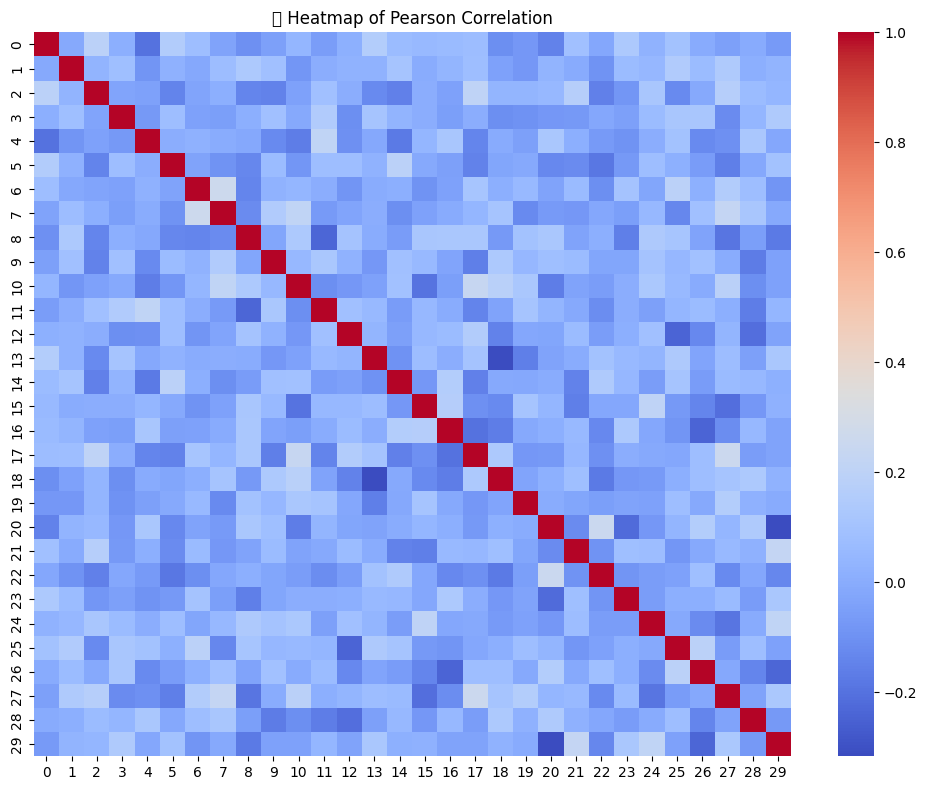

✅ Selected 30 columns with all correlation ≤ 0.7


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matrix = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, cmap='coolwarm')
plt.title("📊 Heatmap of Pearson Correlation")
plt.tight_layout()
plt.show()

selected_cols = cor_matrix.columns[cor_matrix.apply(lambda x: all((x <= 0.7) | (x == 1)))]
selected_df = df[selected_cols]
print(f"✅ Selected {len(selected_cols)} columns with all correlation ≤ 0.7")

#**2.4**

In [ ]:
df_normalized = (df - df.min()) / (df.max() - df.min()) * 10
print("✅ Dataset normalized to range [0, 10]")

✅ Dataset normalized to range [0, 10]


#**2.5**

In [ ]:
df_binary = (df_normalized <= 0.5).astype(int)
print("✅ Binary transformation applied: 1 if ≤ 0.5, else 0")

✅ Binary transformation applied: 1 if ≤ 0.5, else 0


#**Q3**

In [ ]:
import pandas as pd
import numpy as np

# Columns 1–4: values between -10 and 10
part1 = np.random.uniform(-10, 10, size=(500, 4))

# Columns 5–8: values between 10 and 20
part2 = np.random.uniform(10, 20, size=(500, 4))

# Columns 9–10: values between -100 and 100
part3 = np.random.uniform(-100, 100, size=(500, 2))

# Combine all parts into a single DataFrame
data = pd.DataFrame(np.hstack([part1, part2, part3]),
                    columns=[f'Col{i}' for i in range(1, 11)])

print("✅ Dataset generated with shape:", data.shape)

✅ Dataset generated with shape: (500, 10)


#**3.1**

/tmp/ipython-input-13-2404571350.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


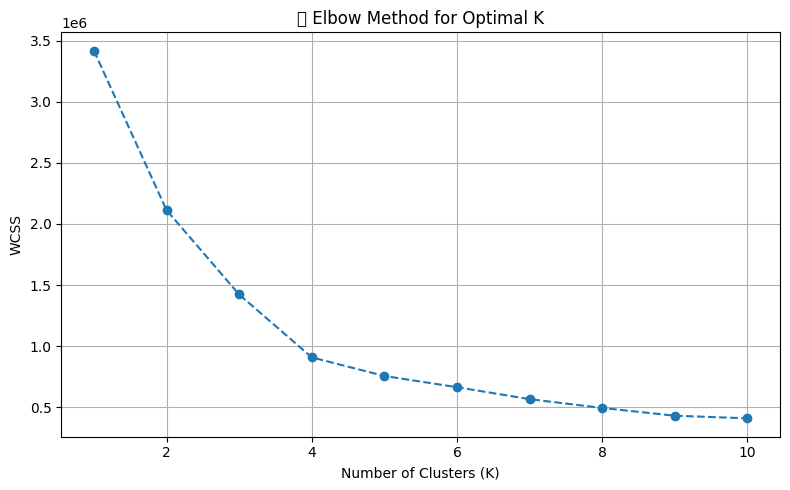

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares

# Try K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('📉 Elbow Method for Optimal K')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Apply K-Means with chosen number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)

# Append cluster labels to the original dataset
data['Cluster'] = clusters
print("✅ Cluster labels added to the dataset.")

✅ Cluster labels added to the dataset.


/tmp/ipython-input-15-2684056781.py:14: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


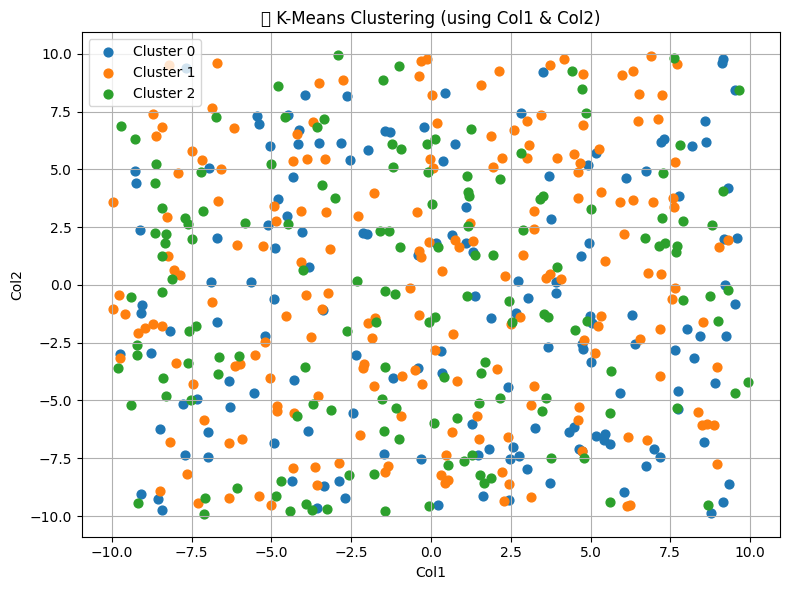

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label in np.unique(clusters):
    plt.scatter(data[data['Cluster'] == label]['Col1'],
                data[data['Cluster'] == label]['Col2'],
                label=f'Cluster {label}', s=40)

plt.xlabel('Col1')
plt.ylabel('Col2')
plt.title('🌀 K-Means Clustering (using Col1 & Col2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#**3.2**

/tmp/ipython-input-16-524092996.py:16: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


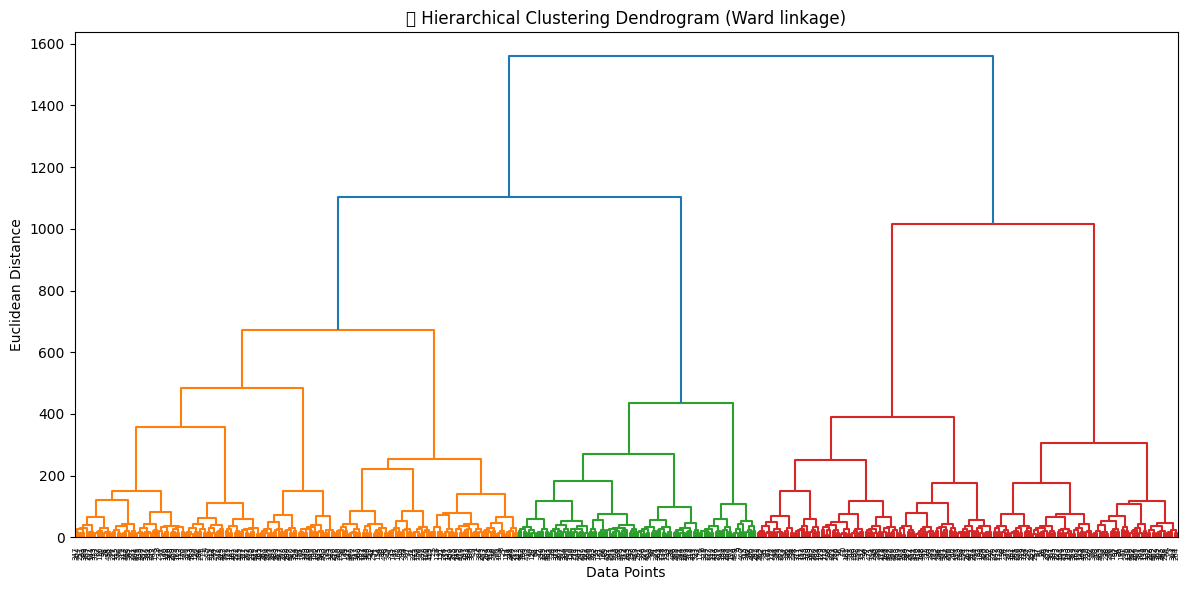

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Use 'ward' linkage method (minimizes variance within clusters)
linked = linkage(data.drop('Cluster', axis=1), method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("🌳 Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_labels
print("✅ Hierarchical cluster labels assigned.")

✅ Hierarchical cluster labels assigned.


#**Q4**

In [ ]:
data = pd.DataFrame(
    np.random.uniform(-100, 100, size=(600, 15)),
    columns=[f'Col{i+1}' for i in range(15)]
)

print("✅ Dataset created with shape:", data.shape)


✅ Dataset created with shape: (600, 15)


#**4.1**

/tmp/ipython-input-20-1518287370.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


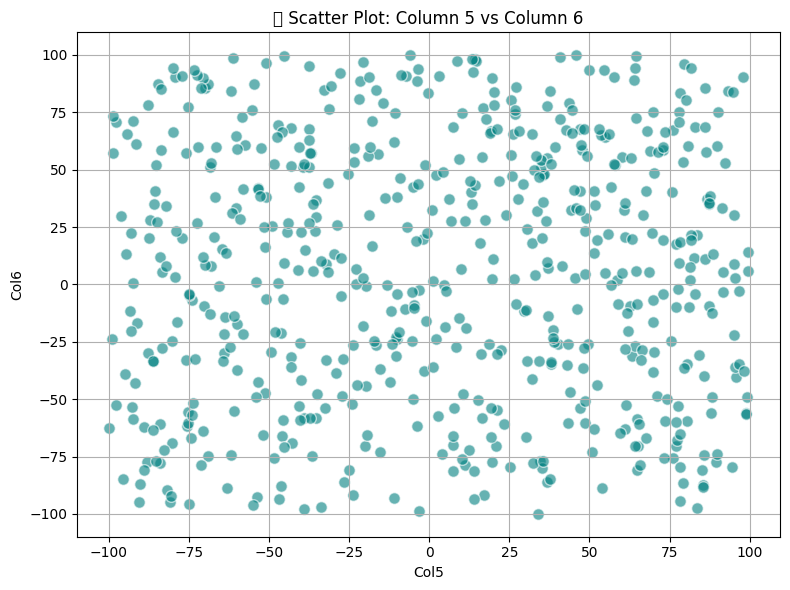

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Col5'], data['Col6'], color='teal', alpha=0.6, edgecolors='w', s=70)
plt.title("📊 Scatter Plot: Column 5 vs Column 6")
plt.xlabel("Col5")
plt.ylabel("Col6")
plt.grid(True)
plt.tight_layout()
plt.show()

#**4.2**

/tmp/ipython-input-21-3487854575.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


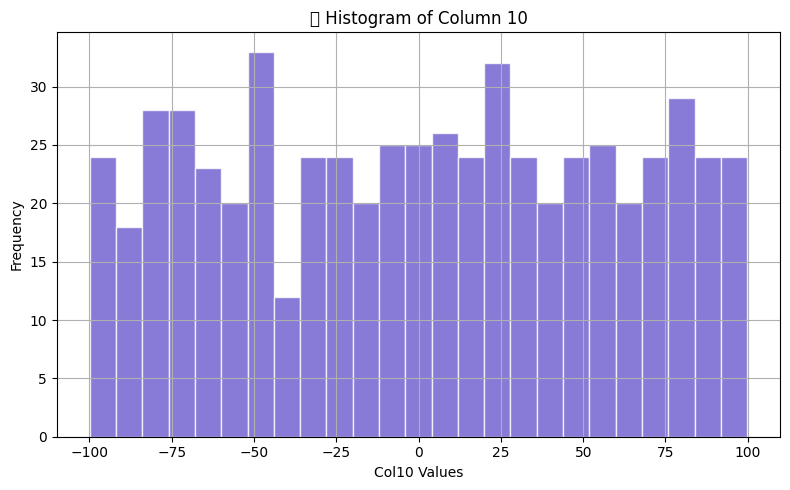

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(data['Col10'], bins=25, color='slateblue', edgecolor='white', alpha=0.8)
plt.title("📊 Histogram of Column 10")
plt.xlabel("Col10 Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

#**4.3**

/tmp/ipython-input-22-2235112246.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


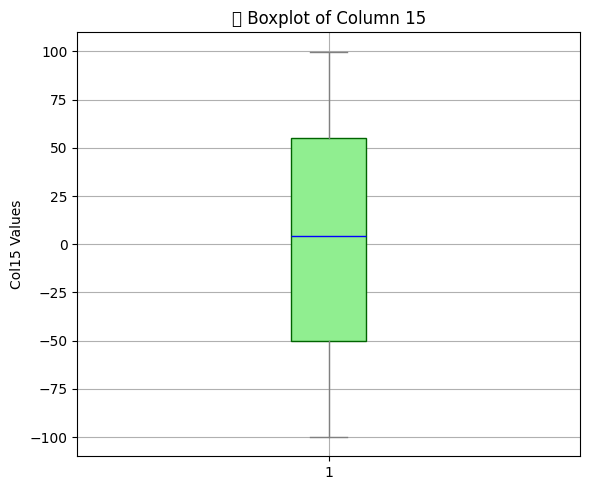

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(data['Col15'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='darkgreen'),
            medianprops=dict(color='blue'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'),
            flierprops=dict(markerfacecolor='red', marker='o'))

plt.title("📦 Boxplot of Column 15")
plt.ylabel("Col15 Values")
plt.grid(True)
plt.tight_layout()
plt.show()

#**Q5**

In [ ]:
data = pd.DataFrame(
    np.random.uniform(5, 10, size=(500, 5)),
    columns=[f'Col{i+1}' for i in range(5)]
)

print("✅ Dataset created with shape:", data.shape)


✅ Dataset created with shape: (500, 5)


#**5.1**

In [ ]:
from scipy.stats import ttest_1samp

for col in data.columns:
    t_stat, p_val = ttest_1samp(data[col], 7.5)
    print(f"📈 {col}: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

📈 Col1: t-stat = -0.2765, p-value = 0.7823
📈 Col2: t-stat = -0.4029, p-value = 0.6872
📈 Col3: t-stat = 0.3493, p-value = 0.7270
📈 Col4: t-stat = -1.1979, p-value = 0.2315
📈 Col5: t-stat = 0.4379, p-value = 0.6616


#**5.2**

In [ ]:
from scipy.stats import wilcoxon

for col in data.columns:
    stat, p_val = wilcoxon(data[col] - 7.5)
    print(f"📉 {col}: Wilcoxon stat = {stat:.4f}, p-value = {p_val:.4f}")

📉 Col1: Wilcoxon stat = 61629.0000, p-value = 0.7580
📉 Col2: Wilcoxon stat = 61407.0000, p-value = 0.7063
📉 Col3: Wilcoxon stat = 61555.0000, p-value = 0.7406
📉 Col4: Wilcoxon stat = 58839.0000, p-value = 0.2415
📉 Col5: Wilcoxon stat = 61222.0000, p-value = 0.6643


#**5.3**

In [ ]:
col3 = data['Col3']
col4 = data['Col4']

In [ ]:
from scipy.stats import ttest_ind   #t-test

t_stat, p_val_t = ttest_ind(col3, col4)
print(f"📊 Two-Sample t-Test:\n t-statistic = {t_stat:.4f}, p-value = {p_val_t:.4f}")

📊 Two-Sample t-Test:
 t-statistic = 1.0870, p-value = 0.2773


In [ ]:
from scipy.stats import mannwhitneyu #wilcoxon Rank sum test

u_stat, p_val_wilcoxon = mannwhitneyu(col3, col4)
print(f"📉 Wilcoxon Rank Sum Test:\n U-statistic = {u_stat:.4f}, p-value = {p_val_wilcoxon:.4f}")

📉 Wilcoxon Rank Sum Test:
 U-statistic = 129890.0000, p-value = 0.2843
